<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%ED%95%B4%EC%84%9D%EC%97%AD%ED%95%99_017_Fowles_CP10_1_SphericalPendulum_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 해석역학
## <Elective Tracks 2024 Summer Programme>

Computer Problems

C10.1 Spherical Pendulum (구면 진자)

<img src='https://drive.google.com/uc?export=download&id=11CXs72-8dWlMMNQw0E-cxLv36TOqZF3g' width="500" height ="" />

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import scipy.fft as fft

In [ ]:
sym.init_printing()

In [ ]:
'''
기본적인 변수 및 상수들의 기호 정의:
'''

theta, phi = sym.symbols(r'\theta \phi', cls=sym.Function) #
g, m, l, t = sym.symbols("g m l t", positive=True)

In [ ]:
'''
일반화 좌표 theta 와 phi의 시간 미분꼴을 구하기 위해 시간의 함수로 정의해준다.
'''
theta = theta(t)
phi = phi(t)

'''
theta, phi의 시간(t)에 대한 1차 및 2차 미분을 정의:
'''

theta_d = sym.diff(theta, t)
phi_d = sym.diff(phi,t)

theta_dd = sym.diff(theta_d, t)
phi_dd = sym.diff(phi_d,t)

$x = l \sin\theta \cos\phi$

$y = l \sin\theta \sin\phi$

$z = -l \cos\theta$

In [ ]:
'''
위치벡터의 카테시안 좌표계 성분:
'''
x =  l * sym.sin(theta) * sym.cos(phi)
y =  l * sym.sin(theta) * sym.sin(phi)
z = -l * sym.cos(theta)

'''
위치값을 계산하는 함수 생성
'''
xf = sym.lambdify((l, theta, phi), x)
yf = sym.lambdify((l, theta, phi), y)
zf = sym.lambdify((l, theta, phi), z)

$v_x = \dfrac{dx}{dt}=\dfrac{\partial x}{\partial \theta}\dfrac{d\theta}{dt}+\dfrac{\partial x}{\partial \phi}\dfrac{d\phi}{dt}=l\cos\theta\cos\phi\dfrac{d\theta}{dt}-l\sin\theta\sin\phi\dfrac{d\phi}{dt}$

$v_y = \dfrac{dy}{dt}=\dfrac{\partial y}{\partial \theta}\dfrac{d\theta}{dt}+\dfrac{\partial y}{\partial \phi}\dfrac{d\phi}{dt}=l\cos\theta\sin\phi\dfrac{d\theta}{dt}+l\sin\theta\cos\phi\dfrac{d\phi}{dt}$

$v_z = \dfrac{dz}{dt}=\dfrac{\partial z}{\partial \theta}\dfrac{d\theta}{dt}=l\sin\theta\dfrac{d\theta}{dt}$

In [ ]:
'''
속도 성분들의 식
'''
vx = sym.diff(x, t)
vy = sym.diff(y, t)
vz = sym.diff(z, t)


In [ ]:
vx

                                d                                           d            
- l⋅sin(\phi(t))⋅sin(\theta(t))⋅──(\phi(t)) + l⋅cos(\phi(t))⋅cos(\theta(t))⋅──(\theta(t))
                                dt                                          dt           

In [ ]:
vy

                              d                                             d          
l⋅sin(\phi(t))⋅cos(\theta(t))⋅──(\theta(t)) + l⋅sin(\theta(t))⋅cos(\phi(t))⋅──(\phi(t))
                              dt                                            dt         

In [ ]:
vz

                 d            
l⋅sin(\theta(t))⋅──(\theta(t))
                 dt           

$T = \dfrac{1}{2} m \left( v_x^2 + v_y^2 +v_z^2 \right)$

$V = m g z$

$L = T - V$

In [ ]:
'''
라그랑지안 생성:
'''
T = (1/2) * m * (vx**2 + vy**2 + vz**2);
V = m * g * z;
L = T - V;
L = L.simplify();
L

    ⎛                         ⎛                             2                  2⎞⎞
    ⎜                         ⎜   2            ⎛d          ⎞    ⎛d            ⎞ ⎟⎟
l⋅m⋅⎜g⋅cos(\theta(t)) + 0.5⋅l⋅⎜sin (\theta(t))⋅⎜──(\phi(t))⎟  + ⎜──(\theta(t))⎟ ⎟⎟
    ⎝                         ⎝                ⎝dt         ⎠    ⎝dt           ⎠ ⎠⎠

In [ ]:
'''
각각 theta, phi에 대한 라그랑주 방정식 eqt, eqp를 구한다
'''
eqt = sym.diff(L,theta) - sym.diff(sym.diff(L,theta_d), t)
eqp = sym.diff(L,phi) - sym.diff(sym.diff(L,phi_d), t)

In [ ]:
eqt

            2                   ⎛                                                                  ↪
       2   d                    ⎜                                                        ⎛d        ↪
- 1.0⋅l ⋅m⋅───(\theta(t)) + l⋅m⋅⎜-g⋅sin(\theta(t)) + 1.0⋅l⋅sin(\theta(t))⋅cos(\theta(t))⋅⎜──(\phi( ↪
             2                  ⎝                                                        ⎝dt       ↪
           dt                                                                                      ↪

↪     2⎞
↪    ⎞ ⎟
↪ t))⎟ ⎟
↪    ⎠ ⎠
↪       

In [ ]:
eqp

                            2                                                                      ↪
       2      2            d                   2                                 d           d     ↪
- 1.0⋅l ⋅m⋅sin (\theta(t))⋅───(\phi(t)) - 2.0⋅l ⋅m⋅sin(\theta(t))⋅cos(\theta(t))⋅──(\phi(t))⋅──(\t ↪
                             2                                                   dt          dt    ↪
                           dt                                                                      ↪

↪         
↪         
↪ heta(t))
↪         
↪         

In [ ]:
phi_dd

 2          
d           
───(\phi(t))
  2         
dt          

In [ ]:
'''
theta, phi 각각의 시간에 대한 이차미분 theta_dd, phi_dd 에 대하여 정리해준다:
'''
sols = sym.solve([eqt, eqp], [theta_dd, phi_dd])

In [ ]:
sols

⎧                                  d           d                                                   ↪
⎪ 2            -2.0⋅cos(\theta(t))⋅──(\phi(t))⋅──(\theta(t))    2                                  ↪
⎪d                                 dt          dt              d                 g⋅sin(\theta(t))  ↪
⎨───(\phi(t)): ──────────────────────────────────────────────, ───(\theta(t)): - ────────────────  ↪
⎪  2                           sin(\theta(t))                    2                      l          ↪
⎪dt                                                            dt                                  ↪
⎩                                                                                                  ↪

↪                                               ⎫
↪                                              2⎪
↪                                 ⎛d          ⎞ ⎪
↪ + sin(\theta(t))⋅cos(\theta(t))⋅⎜──(\phi(t))⎟ ⎬
↪                                 ⎝dt         ⎠ ⎪
↪                                         

In [ ]:
sols[theta_dd]

                                                                2
  g⋅sin(\theta(t))                                 ⎛d          ⎞ 
- ──────────────── + sin(\theta(t))⋅cos(\theta(t))⋅⎜──(\phi(t))⎟ 
         l                                         ⎝dt         ⎠ 

In [ ]:
sols[phi_dd]

                    d           d             
-2.0⋅cos(\theta(t))⋅──(\phi(t))⋅──(\theta(t)) 
                    dt          dt            
──────────────────────────────────────────────
                sin(\theta(t))                

In [ ]:
'''
계산 가능한 함수 생성
'''
theta_dd_f = sym.lambdify((t,g,m,l,theta,phi,theta_d,phi_d), sols[theta_dd])
phi_dd_f = sym.lambdify((t,g,m,l,theta,phi,theta_d,phi_d), sols[phi_dd])

In [ ]:
def dSdt(t, S, g, m, l):
  """
  현재 상태 S=[theta, phi, dthdt, dphdt] 를 받아
  변화율 dSdt를 계산하여 반환한다
  """
  theta, phi, thetad, phid = S
  return [
      thetad,
      phid,
      theta_dd_f(t,g,m,l,theta,phi,thetad,phid),
      phi_dd_f(t,g,m,l,theta,phi,thetad,phid)
  ]

In [ ]:
ivals = [sym.pi/4, 0, 0, 10.57] # [theta0, phi0, dthetadt0, dphidt0]

In [ ]:
'''
시뮬레이션에 사용할 상수들:
'''
grav = 9.8
mass = 1
leng = 0.284

In [ ]:
'''
이차 방정식의 수치해를 구한다:
'''
tf = 40.95

teval = np.linspace(0, tf, 2048)
ans = solve_ivp(dSdt, (0, tf), ivals, t_eval=teval, args=(grav,mass,leng), max_step=0.01)

In [ ]:
ans

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.000e-02 ...  4.093e+01  4.095e+01]
        y: [[ 7.854e-01  7.916e-01 ...  1.150e+00  1.121e+00]
            [ 0.000e+00  2.106e-01 ...  3.192e+02  3.194e+02]
            [ 0.000e+00  6.191e-01 ... -1.314e+00 -1.624e+00]
            [ 1.057e+01  1.044e+01 ...  6.343e+00  6.519e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 24590
     njev: 0
      nlu: 0

In [ ]:
'''
시뮬레이션 결과를 각 변수들에 대하여 분리해 준다:
'''
ts = teval
th = ans.y[0]
ph = ans.y[1]
dthdt = ans.y[2]
dphdt = ans.y[3]

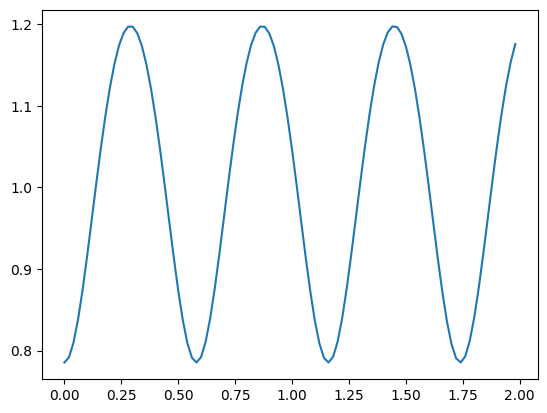

In [ ]:
plt.plot(ts[:100], th[:100])

In [ ]:
def getpos(l, theta, phi):
  return [
      xf(l, theta, phi),
      yf(l, theta, phi),
      zf(l, theta, phi)
  ]

In [ ]:
xs, ys, zs = getpos(leng, th, ph)

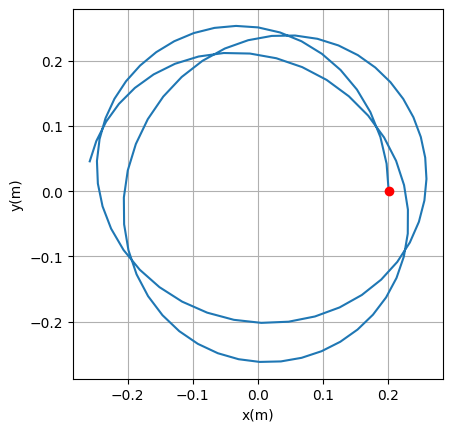

In [ ]:
'''
진자의 운동을 xy 평면에 투영하여 그려본다:
'''

plt.axes().set_aspect(1)
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.grid()
plt.plot(xs[:100], ys[:100])
plt.plot(xs[0], ys[0], 'ro') # starting point

### (a) $\theta_{ 1 }$, $\theta_{ 2 }$ : $\theta$의 변화 범위

In [ ]:
'''
theta의 변화 범위:
'''
th.min(), th.max()

(0.7853981633974483, 1.1978794806375075)

### (b) $\theta$의 진동수 구하기:

FFT로 $\theta(t)$의 주파수 영역의 구성 요소 $\Theta(f)$를 구한다.

$$\Theta_n = \dfrac{1}{\sqrt{2\pi}} \sum_{k=1}^{N}  e^{-2\pi n i/N} \theta(k) ~~~~~(n=0,...,N-1)$$




In [ ]:
freqtheta = fft.fft(th)
'''
Frequency domain Resolution
주파수 영역 해상도:
'''
fres, = freqtheta.shape
fres

2048

In [ ]:
freqtheta[100]

(-1.0717339621758732+1.7409852360674076j)

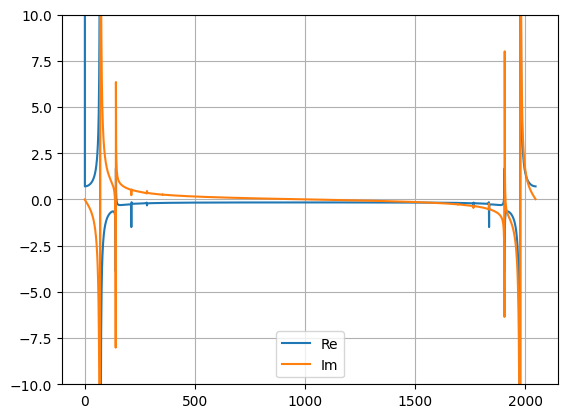

In [ ]:
plt.ylim([-10,10])
plt.grid()
plt.plot(np.real(freqtheta), label="Re")
plt.plot(np.imag(freqtheta), label="Im")
plt.legend()

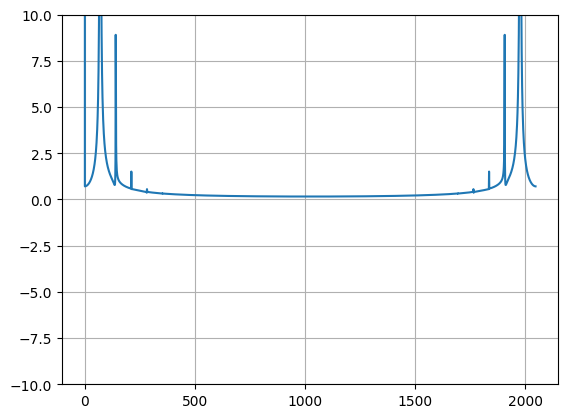

In [ ]:
plt.ylim([-10,10])
plt.grid()
plt.plot(np.abs(freqtheta))

$\uparrow\ \uparrow\ \uparrow$ 위 그래프의 좌우 대칭 형태에 주목 $\uparrow\ \uparrow\ \uparrow$

In [ ]:
import math
from scipy.signal import find_peaks
'''
FFT 결과는 복소수로 주어지는데, 우리가 관심 있는 것은 그 절댓값이므로 절댓값의 배열을 구한다.
이 때 Aliasing을 제거하기 위해 주파수 영역을 반으로 '접어'준다:
'''
absF = abs(freqtheta[:fres//2]) + abs(np.flip(freqtheta)[fres//2:])

'''
주변보다 큰 값을 갖는 피크 값들을 찾아 피크 값들의 위치(인덱스)들을 저장한다:
'''
idpks, _ = find_peaks(absF)

idpks

array([ 71, 141, 212, 214, 283, 354, 424, 495, 528, 599, 669, 740, 809,
       811, 882, 952])

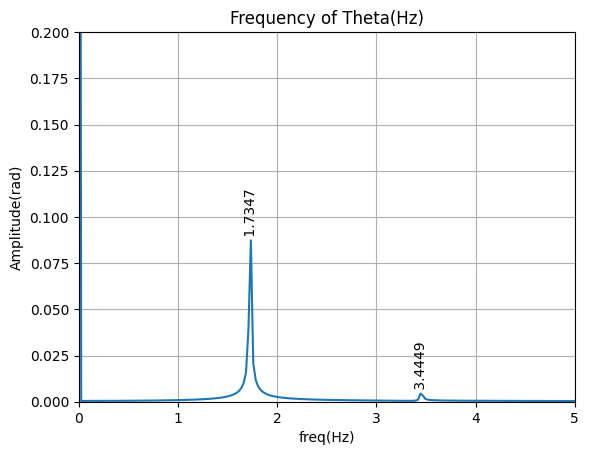

In [ ]:
'''
샘플링 간격: 이 값의 역수가 주파수 영역의 최댓값이다.
'''
dt = np.diff(teval)[0]

'''
샘플링 주파수는 샘플링 간격의 역수:
'''
fs = 1/dt

'''
주파수 구간을 반으로 접어주었으므로 주파수 구간은 절반으로 줄었고, 주파수 영역의 해상도도 res의 1/2 이다.
이에 맞춰 주파수 구간 영역의 배열을 잡아준다:
'''
fdom = np.linspace(0,fs/2,fres//2)

plt.grid()
plt.xlim([0,5])
plt.ylim([0,.2])
plt.plot(fdom, absF/fres)
plt.title("Frequency of Theta(Hz)")
plt.xlabel("freq(Hz)")
plt.ylabel("Amplitude(rad)")
for i in idpks[:2]:
  plt.text(fdom[i], absF[i]/fres, f" {fdom[i]:.4f}",\
           horizontalalignment="center", verticalalignment="bottom", \
           rotation="vertical")

In [ ]:
'''
주파수 영역에서 피크의 위치들
'''
fdom[idpks]

array([ 1.73466915,  3.44490635,  5.1795755 ,  5.22843942,  6.91424466,
        8.64891381, 10.359151  , 12.09382016, 12.90007484, 14.63474399,
       16.34498118, 18.07965034, 19.76545557, 19.81431949, 21.54898865,
       23.25922584])

In [ ]:
'''
주파수 영역의 피크 위치에 대응하는 주기 값
'''
periods = 1/fdom[idpks]
periods

array([0.5764788 , 0.29028365, 0.19306601, 0.19126166, 0.14462896,
       0.11562146, 0.09653301, 0.08268686, 0.07751893, 0.06833054,
       0.06118086, 0.0553108 , 0.05059332, 0.05046855, 0.04640589,
       0.04299369])

위 결과에서 periods[0] 값이 우리가 찾는 $\theta$ 의 진동 주기이다.

In [ ]:
periods[0]

0.5764788044338331

Text(0, 0.5, 'theta(rad)')

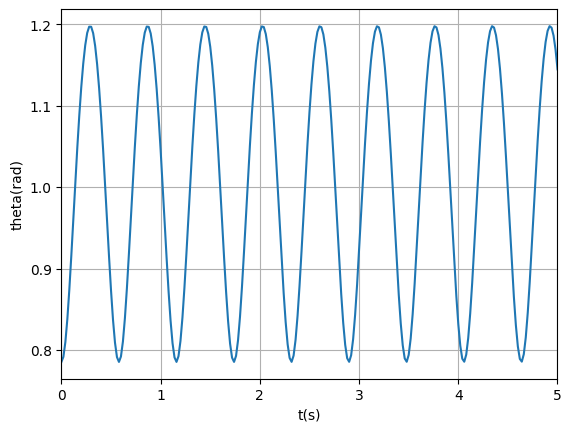

In [ ]:
'''
주기를 찾는 또다른 방법:
우선 theta의 변화 양상을 일부 시간 구간에 대해 그려본다
'''
plt.grid()
plt.xlim([0,5])
plt.plot(teval, th)
plt.xlabel("t(s)")
plt.ylabel("theta(rad)")

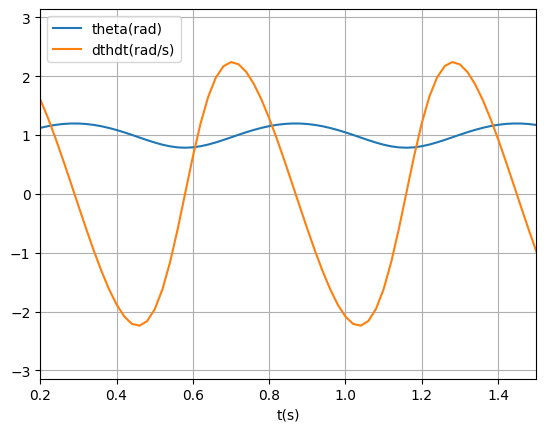

In [ ]:
'''
theta와 theta의시간에 대한 변화율 dthdt를 함께 그려본다
'''

plt.xlim([.2,1.5])
plt.ylim([-np.pi,np.pi])
plt.xlabel("t(s)")
plt.grid()
plt.plot(teval, th, teval, dthdt)
plt.legend(["theta(rad)","dthdt(rad/s)"])

In [ ]:
'''
dthdt가 0이 되는 점을 구하여 theta가 극대, 극소가 되는 시간간격을 구하고자 한다.
이를 위해 먼저 dthdt를 polyfit을사용하여 다항함수로 근사한다.
'''
tlo=0.2      # 시간 구간의 하한
thi = 1.0    # 시간 구간의 상한
idxlo = math.floor(tlo // dt) # tlo에 대응하는 시간 배열의 인덱스 값
idxhi = math.floor(thi // dt) # thi에 대응하는 시간 배열의 인덱스 값
nth = 14     # 원하는 다항함수의 최고 차수

'''
oc: 다항식 근사의 계수 배열
'''
oc = np.polyfit(teval[idxlo:idxhi], dthdt[idxlo:idxhi], nth);
oc, idxlo, idxhi


(array([ 2.05185183e+07, -1.46397663e+08,  4.66028407e+08, -8.70615854e+08,
         1.05433767e+09, -8.59319159e+08,  4.68711217e+08, -1.58504133e+08,
         2.17085194e+07,  7.23288548e+06, -4.79441039e+06,  1.26732669e+06,
        -1.88112700e+05,  1.53162488e+04, -5.31556800e+02]),
 9,
 49)

In [ ]:
'''
oc로 구성한 다항함수
'''

of = np.poly1d(oc);
print(of)

           14             13            12             11
2.052e+07 x  - 1.464e+08 x  + 4.66e+08 x  - 8.706e+08 x 
              10             9             8             7
 + 1.054e+09 x  - 8.593e+08 x + 4.687e+08 x - 1.585e+08 x
              6             5             4             3             2
 + 2.171e+07 x + 7.233e+06 x - 4.794e+06 x + 1.267e+06 x - 1.881e+05 x + 1.532e+04 x - 531.6


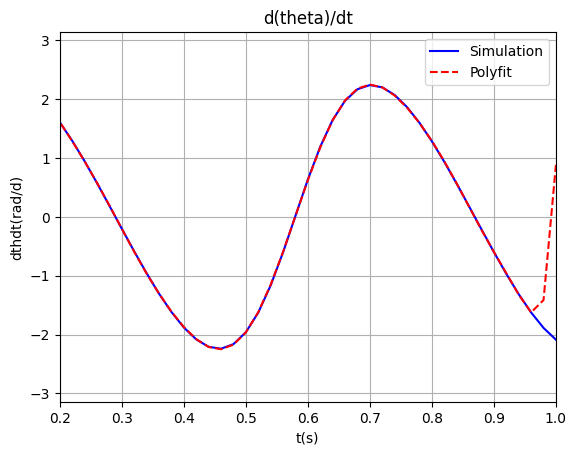

In [ ]:
'''
근사함수가 계산 데이타와 잘 일치하는지 확인하기 위해 그래프로 그려 비교해본다:
'''
plt.grid()
plt.xlabel("t(s)")
plt.ylabel("dthdt(rad/d)")
plt.xlim([tlo,thi])
plt.ylim([-np.pi,np.pi])
plt.title("d(theta)/dt")
plt.plot(teval, dthdt, "b-")
plt.plot(teval, of(teval),"r--")
plt.legend(["Simulation","Polyfit"])

In [ ]:
'''
원하는 구간에서 다항함수가 0이 되는 근을 구한다
'''
ans0 = fsolve(of,[0.25,0.9])
ans0

array([0.28991342, 0.86891577])

In [ ]:
'''
두근 사이의 간격으로 주기를 구한다
'''
Tth = (ans0[1]-ans0[0])
fth = 1/Tth
'''
주기(s), 주파수(Hz) = 1/주기
--> FFT로 구한 주기 및 주파수와 비교해 보시오.
'''
Tth, fth

(0.5790023498828585, 1.7271087072484528)

In [ ]:
fdom[idpks][0] # frequency

1.7346691540239927

In [ ]:
periods[0] # period

0.5764788044338331

### (c) $\theta$를 $\phi$에 대하여 플로팅해본다:

$\phi$의 구간은 2바퀴, 즉 $[0,4\pi]$로 함.

Text(0, 0.5, 'theta(rad)')

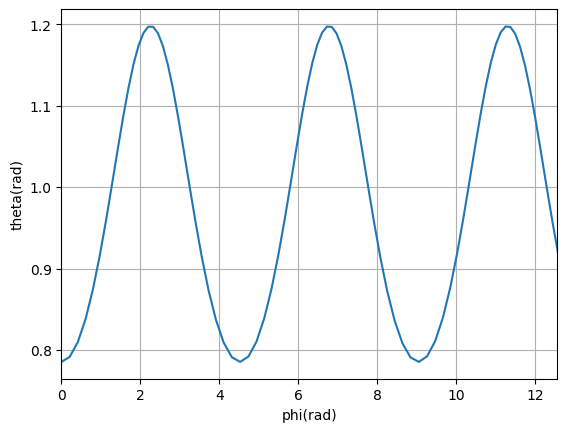

In [ ]:
plt.grid()
plt.xlim([0,4*np.pi])
plt.plot(ph, th)
plt.xlabel("phi(rad)")
plt.ylabel("theta(rad)")

### (d) $\theta$가 극댓값에서 다음 극댓값으로 가는 동안의 $\Delta \phi$ (세차운동)

In [ ]:
'''
max_thetas: 위에서 dthdt가0이 되는 두 시점에서 theta의 값(극대값):
'''
tc = np.polyfit(teval[idxlo:idxhi],th[idxlo:idxhi],nth)
tf = np.poly1d(tc)
max_thetas = tf(ans0)

'''
D_phi: theta가 극값을 갖는 이웃한 시점 사이에 phi의 변화량(세차운동 각)
'''
pc = np.polyfit(teval[idxlo:idxhi], ph[idxlo:idxhi], nth)
pf = np.poly1d(pc)
D_phi = pf(ans0[1])-pf(ans0[0])
max_thetas, D_phi

(array([1.19792101, 1.19786888]), 4.517522210219482)

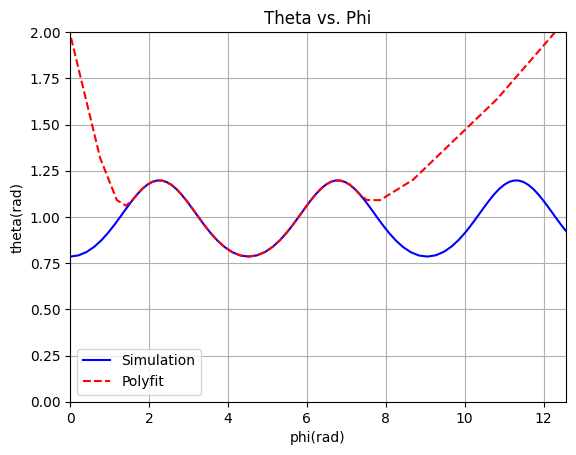

In [ ]:
plt.xlim([0,4*np.pi])
plt.ylim([0,2])
plt.title("Theta vs. Phi")
plt.xlabel("phi(rad)")
plt.ylabel("theta(rad)")
plt.grid()
plt.plot(ph, th,"b-")
plt.plot(pf(teval), tf(teval),"r--")
plt.legend(["Simulation","Polyfit"])